In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
from sklearn.metrics import r2_score

In [2]:
sns.set(rc={"figure.figsize":(12, 8)})
pd.set_option("display.max_columns", None)

# Import data

In [3]:
data = pd.read_csv('../../tresboncoin/data/master/master_with_fuzzy.csv')
#data.drop(columns=['Unnamed: 0'], inplace=True)
data.shape

(18417, 18)

In [4]:
data.head()

,url,uniq_id,brand,bike_year,mileage,bike_type,price,model,engine_size,date_scrapped,fuzzy_score,fuzzy_brand,fuzzy_result_model,fuzzy_result_submodel,fuzzy_result_submodel_inv,fuzzy_result_model_size,fuzzy_result_model_size_inv,fuzzy_result_model_inv
0,https://www.motoplanete.com/occasion-moto/3764...,motoplanete-37642,kawasaki,2021,476.0,Trail,16999.0,versys10002020,1000.0,2021/06/04 - 22h18,100.0,kawasaki,"('100', 90.0, 130)","('versys', 90.0, 353)","('versys', 90.0, 406)","('versys10001043', 78.57142857142857, 74)","('versys10001043', 78.57142857142857, 74)","('100', 90.0, 131)"
1,https://www.motoplanete.com/occasion-moto/2127...,motoplanete-21278,yamaha,2003,5130.0,Custom,3700.0,wildstar,1600.0,2021/06/04 - 22h18,100.0,yamaha,"('roadstar', 62.5, 5)","('xv1600awildstar', 90.0, 107)","('cowlbulletraiderstar', 67.5, 372)","('roadstar1671.6', 56.25, 5)","('roadstar1671.6', 56.25, 5)","('raiderstar', 66.66666666666666, 100)"
2,https://www.motoplanete.com/occasion-moto/1139...,motoplanete-11392,yamaha,2019,2500.0,Routière & GT,13490.0,niken,847.0,2021/06/04 - 22h18,100.0,yamaha,"('niken', 100.0, 339)","('niken', 100.0, 748)","('niken', 100.0, 840)","('niken847', 90.0, 491)","('niken847', 90.0, 491)","('niken', 100.0, 348)"
3,https://www.motoplanete.com/occasion-moto/3923...,motoplanete-39239,bmw,2021,998.0,Roadster,13990.0,rninetpure,1200.0,2021/06/04 - 22h18,100.0,bmw,"('rninet', 90.0, 33)","('rninetpure', 100.0, 62)","('ninetr', 75.0, 173)","('rninet1170', 60.0, 40)","('rninet1170', 60.0, 40)","('tniner', 62.5, 33)"
4,https://www.motoplanete.com/occasion-moto/1536...,motoplanete-15360,yamaha,2016,2600.0,Custom,8500.0,xv950bolt,950.0,2021/06/04 - 22h18,100.0,yamaha,"('bolt', 90.0, 147)","('bolt', 90.0, 228)","('bolt', 90.0, 238)","('xvs950942', 55.55555555555556, 533)","('xvs950942', 55.55555555555556, 533)","('bolt', 90.0, 149)"


In [5]:

data['fuzzy_model'] = data['fuzzy_result_model'].apply(lambda x: unpack_result(x, 0))
data['fuzzy_model_score'] = data['fuzzy_result_model'].apply(lambda x: unpack_result(x, 1))
data.drop(columns='fuzzy_result_model', inplace=True)

data['fuzzy_model_inv'] = data['fuzzy_result_model_inv'].apply(lambda x: unpack_result(x, 0))
data['fuzzy_model_inv_score'] = data['fuzzy_result_model_inv'].apply(lambda x: unpack_result(x, 1))
data.drop(columns='fuzzy_result_model_inv', inplace=True)

data['fuzzy_submodel'] = data['fuzzy_result_submodel'].apply(lambda x: unpack_result(x, 0))
data['fuzzy_submodel_score'] = data['fuzzy_result_submodel'].apply(lambda x: unpack_result(x, 1))
data.drop(columns='fuzzy_result_submodel', inplace=True)

data['fuzzy_submodel_inv'] = data['fuzzy_result_submodel_inv'].apply(lambda x: unpack_result(x, 0))
data['fuzzy_submodel_inv_score'] = data['fuzzy_result_submodel_inv'].apply(lambda x: unpack_result(x, 1))
data.drop(columns='fuzzy_result_submodel_inv', inplace=True)

data['fuzzy_model_size'] = data['fuzzy_result_model_size'].apply(lambda x: unpack_result(x, 0))
data['fuzzy_model_size_score'] = data['fuzzy_result_model_size'].apply(lambda x: unpack_result(x, 1))
data.drop(columns='fuzzy_result_model_size', inplace=True)

data['fuzzy_model_size_inv'] = data['fuzzy_result_model_size_inv'].apply(lambda x: unpack_result(x, 0))
data['fuzzy_model_size_inv_score'] = data['fuzzy_result_model_size_inv'].apply(lambda x: unpack_result(x, 1))
data.drop(columns='fuzzy_result_model_size_inv', inplace=True)

data.head()

,url,uniq_id,brand,bike_year,mileage,bike_type,price,model,engine_size,date_scrapped,fuzzy_score,fuzzy_brand,fuzzy_model,fuzzy_model_score,fuzzy_model_inv,fuzzy_model_inv_score,fuzzy_submodel,fuzzy_submodel_score,fuzzy_submodel_inv,fuzzy_submodel_inv_score,fuzzy_model_size,fuzzy_model_size_score,fuzzy_model_size_inv,fuzzy_model_size_inv_score
0,https://www.motoplanete.com/occasion-moto/3764...,motoplanete-37642,kawasaki,2021,476.0,Trail,16999.0,versys10002020,1000.0,2021/06/04 - 22h18,100.0,kawasaki,100,90.0,100,90.0,versys,90.0,versys,90.0,versys10001043,78.57142857142857,versys10001043,78.57142857142857
1,https://www.motoplanete.com/occasion-moto/2127...,motoplanete-21278,yamaha,2003,5130.0,Custom,3700.0,wildstar,1600.0,2021/06/04 - 22h18,100.0,yamaha,roadstar,62.5,raiderstar,66.66666666666666,xv1600awildstar,90.0,cowlbulletraiderstar,67.5,roadstar1671.6,56.25,roadstar1671.6,56.25
2,https://www.motoplanete.com/occasion-moto/1139...,motoplanete-11392,yamaha,2019,2500.0,Routière & GT,13490.0,niken,847.0,2021/06/04 - 22h18,100.0,yamaha,niken,100.0,niken,100.0,niken,100.0,niken,100.0,niken847,90.0,niken847,90.0
3,https://www.motoplanete.com/occasion-moto/3923...,motoplanete-39239,bmw,2021,998.0,Roadster,13990.0,rninetpure,1200.0,2021/06/04 - 22h18,100.0,bmw,rninet,90.0,tniner,62.5,rninetpure,100.0,ninetr,75.0,rninet1170,60.0,rninet1170,60.0
4,https://www.motoplanete.com/occasion-moto/1536...,motoplanete-15360,yamaha,2016,2600.0,Custom,8500.0,xv950bolt,950.0,2021/06/04 - 22h18,100.0,yamaha,bolt,90.0,bolt,90.0,bolt,90.0,bolt,90.0,xvs950942,55.55555555555556,xvs950942,55.55555555555556


In [6]:
def is_best(fuzzy_model_score, 
            fuzzy_model_inv_score,
            fuzzy_submodel_score, 
            fuzzy_submodel_inv_score,
            fuzzy_model_size_score, 
            fuzzy_model_size_inv_score):
    
    scores = [float(fuzzy_model_score), 
              float(fuzzy_model_inv_score), 
              float(fuzzy_submodel_score), 
              float(fuzzy_submodel_inv_score),
              float(fuzzy_model_size_score), 
              float(fuzzy_model_size_inv_score),] 
    
    max_score= max(scores)
    max_score_postion = scores.index(max_score)

    return max_score_postion

In [7]:
data['fuzzy_model_score'] = data['fuzzy_model_score'].fillna(0)
data['fuzzy_model_inv_score'] = data['fuzzy_model_inv_score'].fillna(0)
data['fuzzy_submodel_score'] = data['fuzzy_submodel_score'].fillna(0)
data['fuzzy_submodel_inv_score'] = data['fuzzy_submodel_inv_score'].fillna(0)
data['fuzzy_model_size_score'] = data['fuzzy_model_size_score'].fillna(0)
data['fuzzy_model_size_inv_score'] = data['fuzzy_model_size_inv_score'].fillna(0)

data['is_best']= data.apply(
    lambda x: is_best(
        x['fuzzy_model_score'],
        x['fuzzy_model_inv_score'],
        x['fuzzy_submodel_score'],
        x['fuzzy_submodel_inv_score'],
        x['fuzzy_model_size_score'],
        x['fuzzy_model_size_inv_score'],),
    axis=1)

data.dropna(subset=['is_best'], inplace=True)

In [9]:
data_model = data.copy()[data.is_best==0]
data_model_inv = data.copy()[data.is_best==1]
data_submodel = data.copy()[data.is_best==2]
data_submodel_inv = data.copy()[data.is_best==3]
data_model_size = data.copy()[data.is_best==4]
data_model_size_inv = data.copy()[data.is_best==5]

In [10]:
motorcycle_database = pd.read_csv('motorcycle_database/bikez.csv')
motorcycle_database.drop(columns='Unnamed: 0',inplace=True)
motorcycle_database.head()

,brand_db,model_db,model_inv_db,model_submodel_db,model_submodel_inv_db,year_db,category_db,engine_type_db,engine_size_db,power_db,torque_db,compression_db,cooling_system_db,dry_weight_db,power/weight_ratio_db,model_size_db,model_size_inv_db
0,ajs,model8,8model,model8350,3508model,1962,sport,single cylinder,348.0,21.0,NaN,7.5:1,Air,153.0,0.1373,model8348,model8348
1,veli,NaN,NaN,vl110gys,110gysupervl110gys,2007,"minibike, cross",single cylinder,110.0,6.7,7.5,10.5:1,Air,46.0,0.1457,nan110,nan110
2,puch,350hwe,hwe350,350hwesafari,safarihwe350,1988,speedway,single cylinder,347.0,27.0,NaN,9.2:1,Air,NaN,NaN,350hwe347,350hwe347
3,puch,gs560,560gs,gs560f4t,t4f560gs,1986,unspecified category,single cylinder,562.0,27.0,NaN,9.2:1,Air,NaN,NaN,gs560562,gs560562
4,yamaha,xmax125,125xmax,xmax125sport,sport125xmax,2011,scooter,single cylinder,124.7,14.0,11.3,11.2:1,Liquid,NaN,NaN,xmax125124.7,xmax125124.7


In [11]:
motorcycle_database.shape

(35036, 17)

In [12]:
motorcycle_database_model = motorcycle_database.copy()
motorcycle_database_model.drop_duplicates(subset=['brand_db','model_db'],inplace=True)

motorcycle_database_model_inv = motorcycle_database.copy()
motorcycle_database_model_inv.drop_duplicates(subset=['brand_db','model_inv_db'],inplace=True)

motorcycle_database_submodel = motorcycle_database.copy()
motorcycle_database_submodel.drop_duplicates(subset=['brand_db','model_submodel_db'],inplace=True)

motorcycle_database_submodel_inv = motorcycle_database.copy()
motorcycle_database_submodel_inv.drop_duplicates(subset=['brand_db','model_submodel_inv_db'],inplace=True)

motorcycle_database_model_size = motorcycle_database.copy()
motorcycle_database_model_size.drop_duplicates(subset=['brand_db','model_size_db'],inplace=True)

motorcycle_database_model_size_inv = motorcycle_database.copy()
motorcycle_database_model_size_inv.drop_duplicates(subset=['brand_db','model_size_inv_db'],inplace=True)

## merged from motorcycle database

In [13]:
data_model = data_model.merge(
    motorcycle_database_model, 
    how='left', 
    left_on=['fuzzy_brand', 'fuzzy_model'], 
    right_on=['brand_db', 'model_db'])

data_model_inv = data_model_inv.merge(
    motorcycle_database_model_inv, 
    how='left', 
    left_on=['fuzzy_brand', 'fuzzy_model_inv'], 
    right_on=['brand_db', 'model_inv_db'])

data_submodel = data_submodel.merge(
    motorcycle_database_submodel, 
    how='left', 
    left_on=['fuzzy_brand', 'fuzzy_submodel'], 
    right_on=['brand_db', 'model_submodel_db'])

data_submodel_inv = data_submodel_inv.merge(
    motorcycle_database_submodel_inv, 
    how='left', 
    left_on=['fuzzy_brand', 'fuzzy_submodel_inv'], 
    right_on=['brand_db', 'model_submodel_inv_db'])

data_model_size = data_model_size.merge(
    motorcycle_database_model_size, 
    how='left', 
    left_on=['fuzzy_brand', 'fuzzy_model_size'], 
    right_on=['brand_db', 'model_size_db'])

data_model_size_inv = data_model_size_inv.merge(
    motorcycle_database_model_size_inv, 
    how='left', 
    left_on=['fuzzy_brand', 'fuzzy_model_size_inv'], 
    right_on=['brand_db', 'model_size_inv_db'])

data = data_model.append(data_model_inv)
data = data.append(data_submodel)
data = data.append(data_submodel_inv)
data = data.append(data_model_size)
data = data.append(data_model_size_inv)
data.reset_index(drop=True)

,url,uniq_id,brand,bike_year,mileage,bike_type,price,model,engine_size,date_scrapped,fuzzy_score,fuzzy_brand,fuzzy_model,fuzzy_model_score,fuzzy_model_inv,fuzzy_model_inv_score,fuzzy_submodel,fuzzy_submodel_score,fuzzy_submodel_inv,fuzzy_submodel_inv_score,fuzzy_model_size,fuzzy_model_size_score,fuzzy_model_size_inv,fuzzy_model_size_inv_score,is_best,brand_db,model_db,model_inv_db,model_submodel_db,model_submodel_inv_db,year_db,category_db,engine_type_db,engine_size_db,power_db,torque_db,compression_db,cooling_system_db,dry_weight_db,power/weight_ratio_db,model_size_db,model_size_inv_db
0,https://www.motoplanete.com/occasion-moto/3764...,motoplanete-37642,kawasaki,2021,476.0,Trail,16999.0,versys10002020,1000.0,2021/06/04 - 22h18,100.0,kawasaki,100,90.0,100,90.0,versys,90.0,versys,90.0,versys10001043,78.57142857142857,versys10001043,78.57142857142857,0,kawasaki,100,100,1000gtr,gtr1000,1990.0,sport touring,in-line four,997.0,92.0,NaN,10.2:1,Liquid,NaN,NaN,100997,100997
1,https://www.motoplanete.com/occasion-moto/1139...,motoplanete-11392,yamaha,2019,2500.0,Routière & GT,13490.0,niken,847.0,2021/06/04 - 22h18,100.0,yamaha,niken,100.0,niken,100.0,niken,100.0,niken,100.0,niken847,90.0,niken847,90.0,0,yamaha,niken,niken,niken,niken,2018.0,naked bike,in-line three,847.0,115.0,61.5,11.5:1,Liquid,NaN,NaN,niken847,niken847
2,https://www.motoplanete.com/occasion-moto/1536...,motoplanete-15360,yamaha,2016,2600.0,Custom,8500.0,xv950bolt,950.0,2021/06/04 - 22h18,100.0,yamaha,bolt,90.0,bolt,90.0,bolt,90.0,bolt,90.0,xvs950942,55.55555555555556,xvs950942,55.55555555555556,0,yamaha,bolt,bolt,boltrspec,rspecbolt,2021.0,custom / cruiser,v2,942.0,NaN,80.4,9.0:1,Air,NaN,NaN,bolt942,bolt942
3,https://www.motoplanete.com/occasion-moto/4082...,motoplanete-40822,kawasaki,2009,20000.0,Routière & GT,8490.0,zzr,1400.0,2021/06/04 - 22h18,100.0,kawasaki,zzr1400,90.0,1400zzr,90.0,zzr600,90.0,600zzr,90.0,zzr14001441,90.0,zzr14001441,90.0,0,kawasaki,zzr1400,1400zzr,zzr1400performancesport,sportperformance1400zzr,2015.0,sport,in-line four,1441.0,200.0,162.5,12.3:1,Liquid,NaN,NaN,zzr14001441,zzr14001441
4,https://www.motoplanete.com/occasion-moto/3248...,motoplanete-32485,harleydavidson,2014,11500.0,Custom,17200.0,softailslim,1584.0,2021/06/04 - 22h18,100.0,harleydavidson,softailslim,100.0,softail,90.0,softailslim,100.0,effectreducedsoftailspringer1340,73.63636363636364,softailslim1801,84.61538461538461,softailslim1801,84.61538461538461,0,harleydavidson,softailslim,slimsoftail,softailslims,sslimsoftail,2016.0,custom / cruiser,v2,1801.0,92.5,145.0,9.5:1,Air,308.0,0.3003,softailslim1801,softailslim1801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18412,https://www.autoscout24.fr/offres/triumph-stre...,autoscout24-as24_b8473dfd-611f-4a91-a093-b96ee...,triumph,2017,17850.0,Roadster,8990.0,streettriple765,765.0,2021-06-12 18:42:14.393519,100.0,triumph,streettriple,88.88888888888889,6tr,59.99999999999999,streettriple675,93.33333333333333,cupstreet,59.99999999999999,streettriple765,100.0,streettriple765,100.0,4,triumph,streettriple,triplestreet,streettriplers,rstriplestreet,2019.0,naked bike,in-line three,765.0,123.0,77.0,12.7:1,Liquid,166.0,0.7410,streettriple765,streettriple765
18413,https://www.autoscout24.fr/offres/honda-z-50-m...,autoscout24-as24_7d399d07-c41e-47ba-bcfc-6a445...,honda,1980,2883.0,Roadster,3600.0,z50,50.0,2021-06-12 18:42:14.393519,100.0,honda,z50r,85.71428571428571,z50r,85.71428571428571,z50r,85.71428571428571,z50r,85.71428571428571,z50r50,90.0,z50r50,90.0,4,honda,z50r,z50r,z50r,z50r,1985.0,"minibike, cross",single cylinder,50.0,NaN,NaN,NaN,Air,NaN,NaN,z50r50,z50r50
18414,https://www.autoscout24.fr/offres/ktm-640-lc-4...,autoscout24-as24_ac839fc0-62ab-d80f-e053-01000...,tm,2004,10041.0,NaN,3250.0,k640lc4,NaN,2021-06-12 18:42:14.393519,90.0,tmracing,c2,45.0,c2,45.0,smx450fcompetition,38.57142857142857,esdreamblackf450smm,38

In [14]:
data.shape

(18417, 42)

In [15]:
data.drop(
    columns=[
        'fuzzy_brand', 'fuzzy_score',
        'fuzzy_model', 'fuzzy_model_score', 'fuzzy_model_inv','fuzzy_model_inv_score', 
        'fuzzy_model_size', 'fuzzy_model_size_score', 'fuzzy_model_size_inv','fuzzy_model_size_inv_score', 
        'fuzzy_submodel', 'fuzzy_submodel_score', 'fuzzy_submodel_inv', 'fuzzy_submodel_inv_score', 
        'is_best','model_submodel_inv_db', 'model_inv_db', 'model_size_db', 'model_size_inv_db'],
    inplace=True)

data.head()

,url,uniq_id,brand,bike_year,mileage,bike_type,price,model,engine_size,date_scrapped,brand_db,model_db,model_submodel_db,year_db,category_db,engine_type_db,engine_size_db,power_db,torque_db,compression_db,cooling_system_db,dry_weight_db,power/weight_ratio_db
0,https://www.motoplanete.com/occasion-moto/3764...,motoplanete-37642,kawasaki,2021,476.0,Trail,16999.0,versys10002020,1000.0,2021/06/04 - 22h18,kawasaki,100,1000gtr,1990.0,sport touring,in-line four,997.0,92.0,NaN,10.2:1,Liquid,NaN,NaN
1,https://www.motoplanete.com/occasion-moto/1139...,motoplanete-11392,yamaha,2019,2500.0,Routière & GT,13490.0,niken,847.0,2021/06/04 - 22h18,yamaha,niken,niken,2018.0,naked bike,in-line three,847.0,115.0,61.5,11.5:1,Liquid,NaN,NaN
2,https://www.motoplanete.com/occasion-moto/1536...,motoplanete-15360,yamaha,2016,2600.0,Custom,8500.0,xv950bolt,950.0,2021/06/04 - 22h18,yamaha,bolt,boltrspec,2021.0,custom / cruiser,v2,942.0,NaN,80.4,9.0:1,Air,NaN,NaN
3,https://www.motoplanete.com/occasion-moto/4082...,motoplanete-40822,kawasaki,2009,20000.0,Routière & GT,8490.0,zzr,1400.0,2021/06/04 - 22h18,kawasaki,zzr1400,zzr1400performancesport,2015.0,sport,in-line four,1441.0,200.0,162.5,12.3:1,Liquid,NaN,NaN
4,https://www.motoplanete.com/occasion-moto/3248...,motoplanete-32485,harleydavidson,2014,11500.0,Custom,17200.0,softailslim,1584.0,2021/06/04 - 22h18,harleydavidson,softailslim,softailslims,2016.0,custom / cruiser,v2,1801.0,92.5,145.0,9.5:1,Air,308.0,0.3003


In [16]:
data.model_db = data.model_db.fillna('-')

In [17]:
def imput_model(model,submodel):
    if model == '-':
        return submodel
    return model

data.model_db = data.apply(lambda x: imput_model(x['model_db'], x['model_submodel_db']), axis=1)
data.head()

,url,uniq_id,brand,bike_year,mileage,bike_type,price,model,engine_size,date_scrapped,brand_db,model_db,model_submodel_db,year_db,category_db,engine_type_db,engine_size_db,power_db,torque_db,compression_db,cooling_system_db,dry_weight_db,power/weight_ratio_db
0,https://www.motoplanete.com/occasion-moto/3764...,motoplanete-37642,kawasaki,2021,476.0,Trail,16999.0,versys10002020,1000.0,2021/06/04 - 22h18,kawasaki,100,1000gtr,1990.0,sport touring,in-line four,997.0,92.0,NaN,10.2:1,Liquid,NaN,NaN
1,https://www.motoplanete.com/occasion-moto/1139...,motoplanete-11392,yamaha,2019,2500.0,Routière & GT,13490.0,niken,847.0,2021/06/04 - 22h18,yamaha,niken,niken,2018.0,naked bike,in-line three,847.0,115.0,61.5,11.5:1,Liquid,NaN,NaN
2,https://www.motoplanete.com/occasion-moto/1536...,motoplanete-15360,yamaha,2016,2600.0,Custom,8500.0,xv950bolt,950.0,2021/06/04 - 22h18,yamaha,bolt,boltrspec,2021.0,custom / cruiser,v2,942.0,NaN,80.4,9.0:1,Air,NaN,NaN
3,https://www.motoplanete.com/occasion-moto/4082...,motoplanete-40822,kawasaki,2009,20000.0,Routière & GT,8490.0,zzr,1400.0,2021/06/04 - 22h18,kawasaki,zzr1400,zzr1400performancesport,2015.0,sport,in-line four,1441.0,200.0,162.5,12.3:1,Liquid,NaN,NaN
4,https://www.motoplanete.com/occasion-moto/3248...,motoplanete-32485,harleydavidson,2014,11500.0,Custom,17200.0,softailslim,1584.0,2021/06/04 - 22h18,harleydavidson,softailslim,softailslims,2016.0,custom / cruiser,v2,1801.0,92.5,145.0,9.5:1,Air,308.0,0.3003


# Clean data

In [18]:
before = data.shape[0]
data = data[(data['model']!= 'r1200')]
after= data.shape[0]
print(before-after, "rows removed")

129 rows removed


In [19]:
before = data.shape[0]
data = data[(data['model']!= 'r 1200')]
after= data.shape[0]
print(before-after, "rows removed")

0 rows removed


In [20]:
before = data.shape[0]
data = data[(data['engine_size']<2000)&(data['engine_size']>45)]
after= data.shape[0]
print(before-after, "rows removed")

387 rows removed


In [21]:
before = data.shape[0]
data = data[data['mileage']<500000]
after= data.shape[0]
print(before-after, "rows removed")

4 rows removed


In [22]:
before = data.shape[0]
data = data[data['price']>100]
after= data.shape[0]
print(before-after, "rows removed")

9 rows removed


In [23]:
before = data.shape[0]
data = data[data['price']<60000]
after= data.shape[0]
print(before-after, "rows removed")

1 rows removed


In [24]:
before = data.shape[0]
data = data[data['bike_year']>1800]
after= data.shape[0]
print(before-after, "rows removed")

0 rows removed


In [25]:
before = data.shape[0]
data = data[data['bike_year']<=datetime.now().year]
after= data.shape[0]
print(before-after, "rows removed")

6 rows removed


In [26]:
before = data.shape[0]
data.dropna(subset=['model_db'], inplace=True)
after= data.shape[0]
print(before-after, "rows removed")

6 rows removed


In [27]:
before = data.shape[0]
data.drop_duplicates(subset=['model_db','brand_db', 'mileage', 'price', 'bike_year'], inplace=True)
after= data.shape[0]
print(before-after, "rows removed")

5360 rows removed


In [28]:
data.to_csv("master_with_fuzzy_and_cleaning.csv", index=False)

In [29]:
data.head()

,url,uniq_id,brand,bike_year,mileage,bike_type,price,model,engine_size,date_scrapped,brand_db,model_db,model_submodel_db,year_db,category_db,engine_type_db,engine_size_db,power_db,torque_db,compression_db,cooling_system_db,dry_weight_db,power/weight_ratio_db
0,https://www.motoplanete.com/occasion-moto/3764...,motoplanete-37642,kawasaki,2021,476.0,Trail,16999.0,versys10002020,1000.0,2021/06/04 - 22h18,kawasaki,100,1000gtr,1990.0,sport touring,in-line four,997.0,92.0,NaN,10.2:1,Liquid,NaN,NaN
1,https://www.motoplanete.com/occasion-moto/1139...,motoplanete-11392,yamaha,2019,2500.0,Routière & GT,13490.0,niken,847.0,2021/06/04 - 22h18,yamaha,niken,niken,2018.0,naked bike,in-line three,847.0,115.0,61.5,11.5:1,Liquid,NaN,NaN
2,https://www.motoplanete.com/occasion-moto/1536...,motoplanete-15360,yamaha,2016,2600.0,Custom,8500.0,xv950bolt,950.0,2021/06/04 - 22h18,yamaha,bolt,boltrspec,2021.0,custom / cruiser,v2,942.0,NaN,80.4,9.0:1,Air,NaN,NaN
3,https://www.motoplanete.com/occasion-moto/4082...,motoplanete-40822,kawasaki,2009,20000.0,Routière & GT,8490.0,zzr,1400.0,2021/06/04 - 22h18,kawasaki,zzr1400,zzr1400performancesport,2015.0,sport,in-line four,1441.0,200.0,162.5,12.3:1,Liquid,NaN,NaN
4,https://www.motoplanete.com/occasion-moto/3248...,motoplanete-32485,harleydavidson,2014,11500.0,Custom,17200.0,softailslim,1584.0,2021/06/04 - 22h18,harleydavidson,softailslim,softailslims,2016.0,custom / cruiser,v2,1801.0,92.5,145.0,9.5:1,Air,308.0,0.3003


# Feature engineering

## Calculated

In [30]:
def km_per_year(km, bike_year):
    if (datetime.now().year- bike_year) == 0:
        return km
    return km / (datetime.now().year- bike_year)

data['km/year'] = data.apply(lambda x: km_per_year(x['mileage'],x['bike_year']), axis=1)

In [31]:
def price_per_cc_per_km(cc, price, mileage):
    return (price/cc) / mileage

data['price/cc/km'] = data.apply(lambda x: price_per_cc_per_km(x['engine_size'],x['price'], x['mileage'] ), axis=1)

# Explore data

In [32]:
data.model.value_counts()

mp3500lt                                      100
r1200rt                                        90
burgman                                        85
tmax530                                        82
xmax300abs                                     82
                                             ... 
peoples125                                      1
mp3500hpssport                                  1
fz6fazers298cv36200km                           1
cygnusx                                         1
stpaneuropeanpetitchocrivcartegrisen°12875      1
Name: model, Length: 4080, dtype: int64

In [33]:
data.model_submodel_db.value_counts()

tmax              199
r1200rt           165
mp3500sport       154
mp3400lt          134
fjr1300ae         126
                 ... 
smr250              1
xl125vvaradero      1
250excfsixdays      1
gunner              1
ts50er              1
Name: model_submodel_db, Length: 1643, dtype: int64

## Overview

In [34]:
data.model.nunique()

4080

In [35]:
data.model_submodel_db.nunique()

1643

## Price
### vs mileage (km) per category

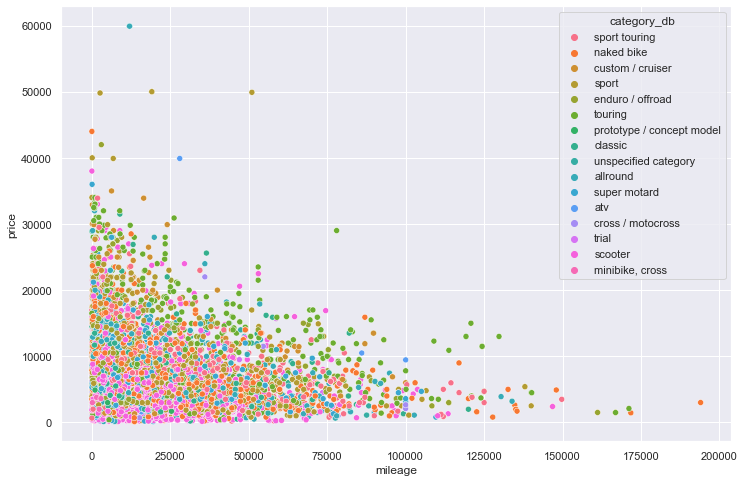

In [36]:
sns.scatterplot(x='mileage', y='price', hue='category_db', data=data);

### vs mileage (km) per engine size

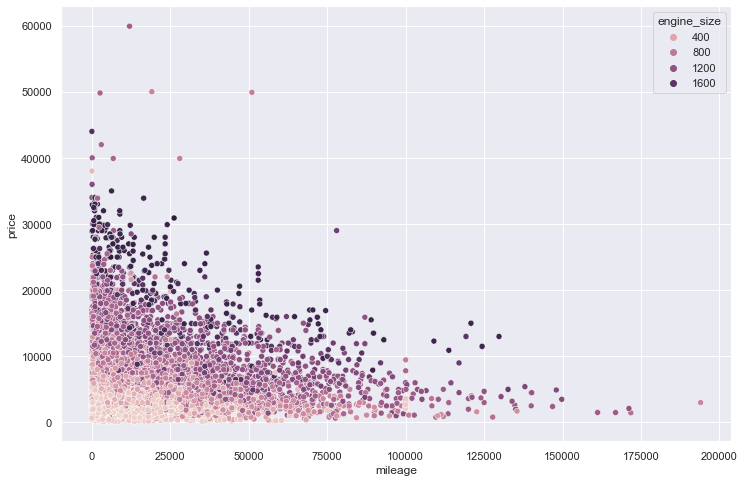

In [37]:
sns.scatterplot(x='mileage', y='price', hue='engine_size', data=data);

### vs mileage (km) per power range

In [38]:
data.head()

,url,uniq_id,brand,bike_year,mileage,bike_type,price,model,engine_size,date_scrapped,brand_db,model_db,model_submodel_db,year_db,category_db,engine_type_db,engine_size_db,power_db,torque_db,compression_db,cooling_system_db,dry_weight_db,power/weight_ratio_db,km/year,price/cc/km
0,https://www.motoplanete.com/occasion-moto/3764...,motoplanete-37642,kawasaki,2021,476.0,Trail,16999.0,versys10002020,1000.0,2021/06/04 - 22h18,kawasaki,100,1000gtr,1990.0,sport touring,in-line four,997.0,92.0,NaN,10.2:1,Liquid,NaN,NaN,476.000000,0.035712
1,https://www.motoplanete.com/occasion-moto/1139...,motoplanete-11392,yamaha,2019,2500.0,Routière & GT,13490.0,niken,847.0,2021/06/04 - 22h18,yamaha,niken,niken,2018.0,naked bike,in-line three,847.0,115.0,61.5,11.5:1,Liquid,NaN,NaN,1250.000000,0.006371
2,https://www.motoplanete.com/occasion-moto/1536...,motoplanete-15360,yamaha,2016,2600.0,Custom,8500.0,xv950bolt,950.0,2021/06/04 - 22h18,yamaha,bolt,boltrspec,2021.0,custom / cruiser,v2,942.0,NaN,80.4,9.0:1,Air,NaN,NaN,520.000000,0.003441
3,https://www.motoplanete.com/occasion-moto/4082...,motoplanete-40822,kawasaki,2009,20000.0,Routière & GT,8490.0,zzr,1400.0,2021/06/04 - 22h18,kawasaki,zzr1400,zzr1400performancesport,2015.0,sport,in-line four,1441.0,200.0,162.5,12.3:1,Liquid,NaN,NaN,1666.666667,0.000303
4,https://www.motoplanete.com/occasion-moto/3248...,motoplanete-32485,harleydavidson,2014,11500.0,Custom,17200.0,softailslim,1584.0,2021/06/04 - 22h18,harleydavidson,softailslim,softailslims,2016.0,custom / cruiser,v2,1801.0,92.5,145.0,9.5:1,Air,308.0,0.3003,1642.857143,0.000944


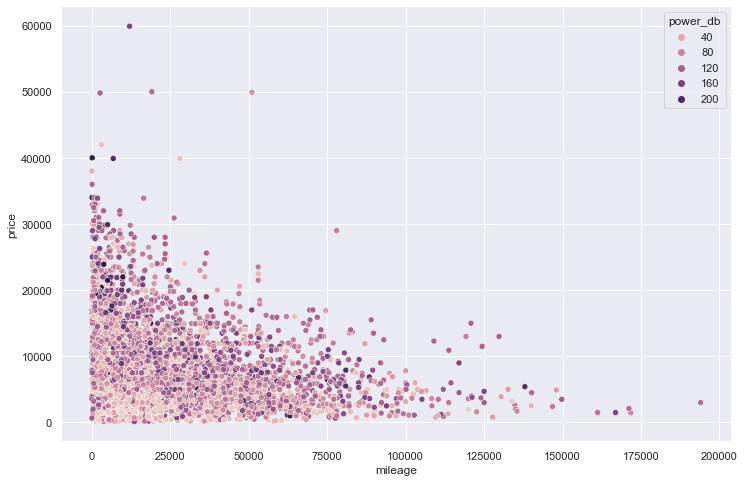

In [39]:
sns.scatterplot(x='mileage', y='price', hue='power_db', data=data);

### vs year of release per category

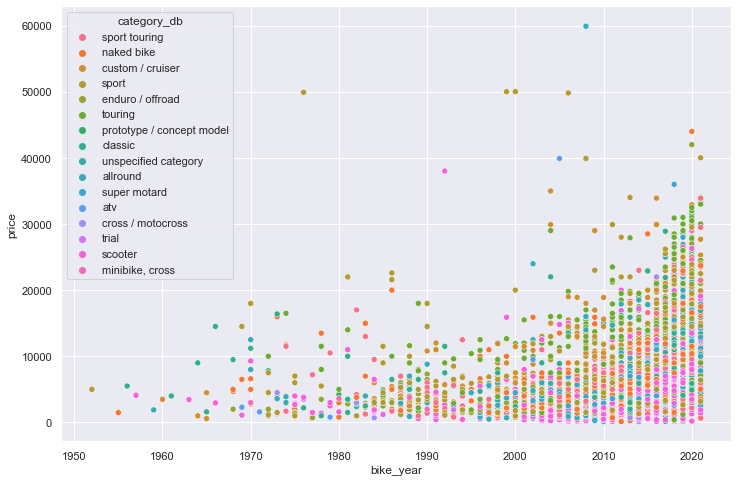

In [40]:
sns.scatterplot(x='bike_year', y='price', hue='category_db',data=data);

### vs year of release per engine size

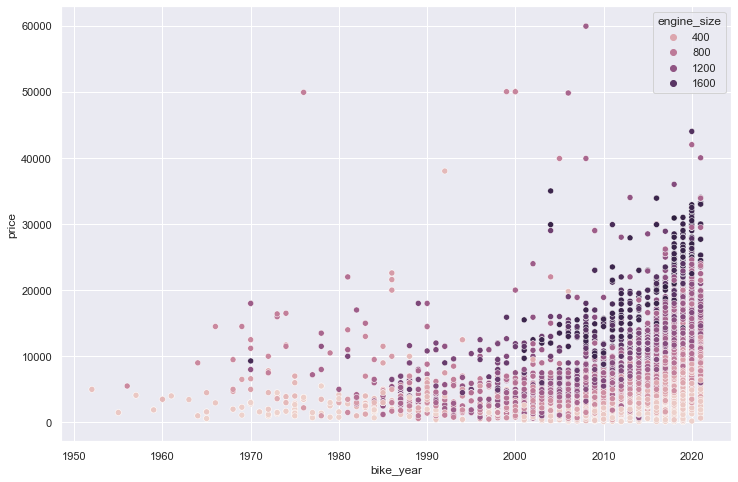

In [41]:
sns.scatterplot(x='bike_year', y='price', hue='engine_size', data=data);

### vs km/year

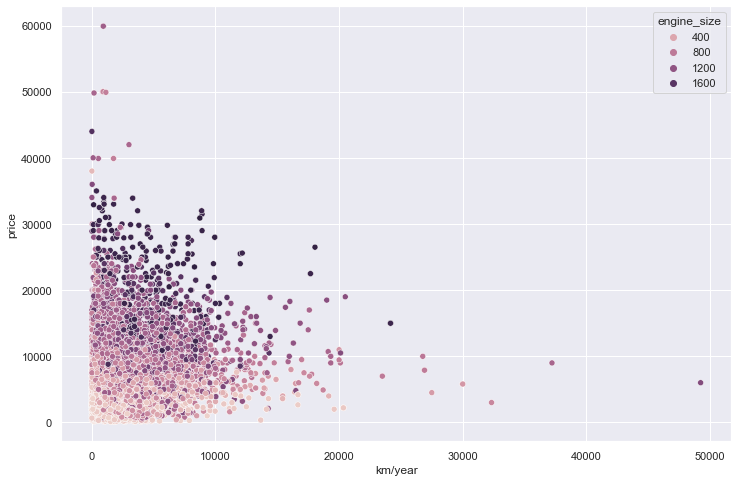

In [42]:
sns.scatterplot(x='km/year', y='price', hue='engine_size',data=data);

## Price/cc vs km

In [43]:
data['price/cc/km'].mean()

0.1251841721486922

### Average price per engine size

In [44]:
data.groupby('engine_size').agg(Mean=('price', 'mean'), Std=('price', 'std'), Count=('price', 'count'))

,Mean,Std,Count
engine_size,,,
48.0,11500.000000,NaN,1
49.0,2252.000000,489.101217,5
50.0,1948.898917,1449.762613,277
65.0,3740.000000,100.000000,4
70.0,3427.500000,616.296543,8
...,...,...,...
1868.0,26146.666667,3636.227441,9
1890.0,20663.333333,282.901632,3
1900.0,14893.333333,7453.591975,3


### Average price per category

In [45]:
data.groupby('category_db').agg(Mean=('price', 'mean'), Std=('price', 'std'), Count=('price', 'count'))

,Mean,Std,Count
category_db,,,
allround,7936.774468,5640.956075,940
atv,9081.777778,7885.740629,63
classic,7594.997050,4234.298521,678
cross / motocross,7622.576923,5005.358188,156
custom / cruiser,9501.362319,6724.385252,621
enduro / offroad,8820.681761,5791.253728,795
"minibike, cross",4769.538462,3407.316432,13
naked bike,7093.323466,4708.121976,1858
prototype / concept model,7590.415094,4598.502869,53


### Average price per brand

In [46]:
data.groupby('brand_db').agg(Mean=('price', 'mean'), Std=('price', 'std'), Count=('price', 'count'))

,Mean,Std,Count
brand_db,,,
access,8687.500000,8635.814476,4
ace,4290.000000,NaN,1
adly,11490.000000,NaN,1
alta,22000.000000,NaN,1
aprilia,7401.585859,4744.040750,198
...,...,...,...
voge,17684.833333,21883.083973,6
voxan,9992.500000,6681.817991,4
xingyue,8108.333333,4892.346915,3


### Average price per model

In [47]:
data.groupby(['brand_db','model_db']).agg(Mean=('price', 'mean'), Std=('price', 'std'), Count=('price', 'count'))

Mean          Std  Count
brand_db model_db                                                 
access   shade                    11200.000000  8601.744009      3
         xtremeenduro300           1150.000000          NaN      1
ace      titanyzf1000rthunderace   4290.000000          NaN      1
adly     jet100                   11490.000000          NaN      1
alta     redshift                 22000.000000          NaN      1
...                                        ...          ...    ...
yamaha   yzfr3                     5426.333333   912.173412      3
         yzfr6                     6122.250000  4484.949675      4
         yzfr7                    49999.000000     0.000000      2
zero     heskethzero              11500.000000          NaN      1
         s                         7651.666667  6070.632312      6

[1428 rows x 3 columns]

## Correlation matrix

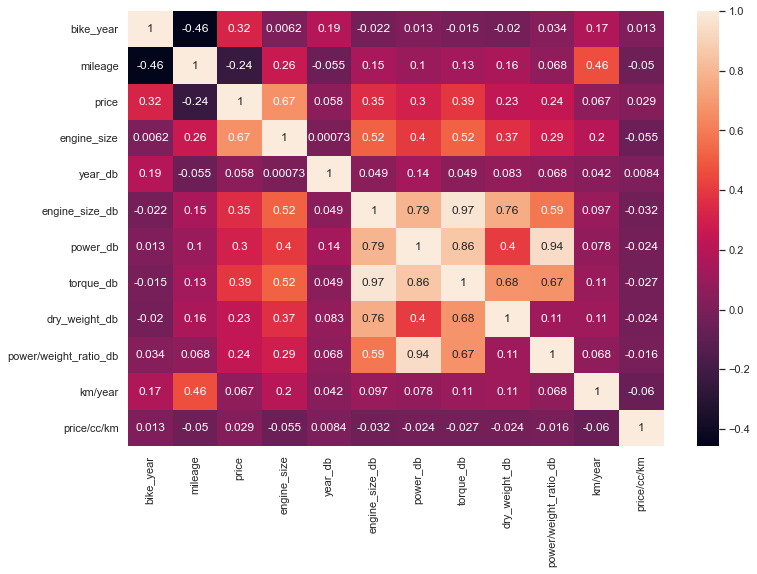

In [48]:
sns.heatmap(data.corr(), annot = True);

# BASELINE

In [49]:
# mean
average_price = data.price.mean()

#rmse
rmse_baseline = np.sqrt(sum((data['price']-average_price)**2)/((data['price'].count())))

print("Average price :", average_price)
print("RMSE Baseline", rmse_baseline )

Average price : 7588.487495005993
RMSE Baseline 5550.784196438278


In [ ]:
sns.displot(data.price)

# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

## Numerical features (not scaled)

In [ ]:
data_1 = data.copy()
data_1.shape

In [ ]:
features_1 = ['bike_year', 'mileage', 'km/year', 'engine_size']

In [ ]:
for feature in features_1:
    data_1.dropna(subset=[feature],inplace=True)
data_1.shape  

In [ ]:
X = data_1[features_1]
y = data_1['price']

model_1 = LinearRegression()

cv_results = cross_validate(model_1, X, y, cv=5)
cv_results['test_score'].mean()

## Numerical features (not scaled) + brand encoded

In [ ]:
data_2 = data.copy()[['brand', 'bike_year', 'mileage', 'engine_size', 'km/year', 'price']]
data_2.reset_index(inplace=True, drop=True)

ohe = OneHotEncoder(sparse=False)

ohe.fit(data_2[['brand']])

feature_encoded = ohe.transform(data_2[['brand']])

encoded = pd.DataFrame(feature_encoded, columns=ohe.categories_)

encoded = encoded.T.reset_index().set_index('level_0').T

data_2 = data_2.join(encoded,how="inner")

X = data_2.drop(columns=['brand', 'price'])
y = data_2['price']

model_2 = LinearRegression()

cv_results = cross_validate(model_2, X, y, cv=5)
cv_results['test_score'].mean()

## KNeighborsRegressor - Numerical features (not scaled) + brand encoded

In [ ]:
data_2 = data.copy()[['brand', 'bike_year', 'mileage', 'engine_size', 'km/year', 'price']]
data_2.reset_index(inplace=True, drop=True)

ohe = OneHotEncoder(sparse=False)

ohe.fit(data_2[['brand']])

feature_encoded = ohe.transform(data_2[['brand']])

encoded = pd.DataFrame(feature_encoded, columns=ohe.categories_)

encoded = encoded.T.reset_index().set_index('level_0').T

data_2 = data_2.join(encoded,how="inner")

X = data_2.drop(columns=['brand', 'price'])
y = data_2['price']

In [ ]:
model_3 = KNeighborsRegressor(n_neighbors=5)

cv_results = cross_validate(model_3, X, y, cv=5)
cv_results['test_score'].mean()

## KNeighborsRegressor - Numerical features (scaled) + brand encoded

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

data_4 = data.copy()[['brand_db', 'bike_year','mileage','engine_size','price','km/year']]
data_4.reset_index(inplace=True, drop=True)
data_4.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for feature in ['bike_year','mileage','engine_size','price','km/year']:
    data_4[feature]=scaler.fit_transform(data_4[[feature]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe.fit(data_4[['brand_db']])

feature_encoded = ohe.transform(data_4[['brand_db']])

encoded = pd.DataFrame(feature_encoded, columns=ohe.categories_)

encoded = encoded.T.reset_index().set_index('level_0').T

data_4 = data_4.join(encoded,how="inner")

features_4 = data_4.drop(columns=['brand_db'])

In [ ]:
X = features_4
y = data_4['price']

model_4 = KNeighborsRegressor(n_neighbors=3)

cv_results = cross_validate(model_4, X, y, cv=5, scoring=['neg_root_mean_squared_error', 'r2'])
print("r2", cv_results['test_r2'].mean())
print("RMSE",cv_results['test_neg_root_mean_squared_error'].mean())

# TPOT

In [ ]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

data_5 = data.copy()[['bike_year','mileage','engine_size','price','km/year']]

X = data_5[['bike_year','mileage','engine_size','km/year']]
Y = data_5.price

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

# PIPELINE

In [52]:
# sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor


# others
from scipy import stats

# MLFLOW PARAMETERS
MLFLOW_URI = "https://mlflow.lewagon.co/"
CUSTOMURI = ""
myname = "VictorBnnt"
EXPERIMENT_NAME = f"[FR] [Paris] [{myname}] TresBonCoin"

######################################################
# Random Forest Classifier model
######################################################
grid_ETR = {'model__max_depth': stats.randint(1, 1000),
            'model__algorithm': ['ball_tree', 'kd_tree'],
            'model__leaf_size': np.linspace(25, 40, num=45),
            'model__p': [1,2],
            "preprocessor__scaler": [StandardScaler(), RobustScaler(), MinMaxScaler()]
            }
params_ETR = {"random_grid_search": grid_ETR,
              "model": ExtraTreesRegressor()}
######################################################

######################################################
# KNeighborsRegressor model
######################################################
grid_KNR = {'model__weights':['distance','uniform'] ,
            'model__min_samples_split': [2, 4, 6, 8, 10],
            "preprocessor__scaler": [StandardScaler(), RobustScaler(), MinMaxScaler()]
            }
params_KNR = {"random_grid_search": grid_ETR,
              "model": KNeighborsRegressor()}
######################################################